In [21]:
%matplotlib inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn

import seaborn as sns

df = pd.read_csv('train.csv')

In [22]:
#check the data
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [23]:
#check if there is any null values
df.isna().sum()

id       0
label    0
tweet    0
dtype: int64

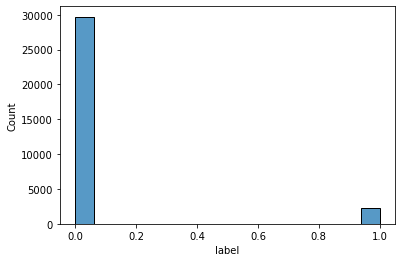

In [24]:
#plot histogram of hateful vs non-hateful tweets
sns.histplot(x='label', data=df)
plt.show()

In [25]:
df.label.value_counts()/len(df)

0    0.929854
1    0.070146
Name: label, dtype: float64

In [26]:
#maximum length of tweets
len_reviews = df.tweet.str.len()
max(len_reviews)

274

In [27]:
df.loc[df.tweet.str.len()== 274]

,id,label,tweet
19770,19771,0,@user lmfao pathetic #soit #growup #funny #...


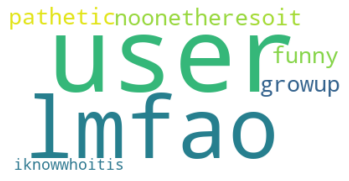

In [28]:
#wordcloud of the longest tweet
from wordcloud import WordCloud
sentiment = WordCloud(background_color="white").generate(df.tweet[19770])
plt.imshow(sentiment, interpolation='bilinear')
plt.axis('off')
plt.show()

In [29]:
#check the longest tweet: it seems most are non-english characters
df.tweet[19770]

' @user lmfao pathetic #soit   #growup #funny #noonethere #iknowwhoitis ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f\x98±ð\x9f\x98±ð\x9f¤\x97ð\x9f¤\x97ð\x9f\x98±ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82â\x80¦'

In [30]:
#Use countvectorizer to make a bag of words
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(max_features=1000)
vect.fit(df.tweet)
X = vect.transform(df.tweet)
X_df= pd.DataFrame(X.toarray(), columns=vect.get_feature_names())

In [31]:
#check the bag of words for the first few rows
pd.set_option('display.max_columns', None)
X_df.head()

,00,06,10,100,11,12,13,15,16,1st,20,2016,2017,24,2nd,30,3d,50,able,about,account,act,actor,actually,adapt,adventure,affirmation,affirmations,after,afternoon,again,against,ago,agree,ahead,all,allahsoil,almost,alone,along,already,also,altwaystoheal,always,am,amazing,america,american,americans,amp,an,and,angry,animals,anniversary,another,anxiety,any,anymore,anyone,anything,app,apple,are,aren,around,arrived,as,ask,ass,at,attack,available,away,awesome,aww,babies,baby,back,bad,bday,be,beach,bear,beautiful,beauty,because,become,bed,been,beer,before,behind,being,believe,best,better,big,bihday,bing,birds,bit,black,bless,blessed,blog,blonde,blue,blur,body,bong,book,booked,both,bought,boy,boyfriend,boys,break,breakfast,brexit,bring,broken,brother,buffalo,bull,business,busy,but,buy,by,cake,call,called,came,can,cannot,cant,cantwait,car,care,cat,cats,cause,celebrate,change,chase,check,child,children,chill,choose,city,class,climb,close,club,coffee,cold,college,color,come,comes,coming,comments,community,complete,conce,conference,congrats,control,cool,could,couldn,countdown,country,couple,course,crazy,cry,crying,culture,customer,cute,dad,daddy,dads,daily,damn,dance,dark,date,daughter,day,days,dead,dear,death,delete,deletetweets,depressed,depression,design,despite,development,did,didn,die,different,dinner,direct,disappointed,disney,dj,do,does,doesn,dog,dogs,doing,dominate,don,done,dont,down,dream,dreams,drink,drinks,due,during,each,early,easy,eat,education,else,empty,end,england,enjoy,enjoying,enough,environment,episode,euro2016,even,evening,event,ever,every,everyday,everyone,everything,excited,exciting,expanse,experience,eyes,face,facebook,fact,fall,families,family,fan,fans,fantastic,far,fashion,father,fathers,fathersday,favorite,fear,feel,feeling,feelings,feels,festival,few,film,final,finally,find,finding,finished,first,fitness,flag,florida,flowers,follow,followers,followme,followâ,food,football,for,forever,forex,forget,forward,found,france,free,freedom,fresh,friday,fridayfeeling,friend,friends,friendship,from,fuck,fucking,full,fun,funny,future,game,games,garden,gave,gay,gbp,get,gets,getting,gift,girl,girls,give,giving,glad,go,goals,god,goes,going,gold,gone,gonna,good,goodmorning,gop,gorgeous,gorilla,got,gotta,grateful,great,green,group,gt,guess,gun,guns,guy,guys,gym,had,haha,hair,half,happen,happened,happening,happier,happiness,happy,hard,hardcore,has,hate,hatred,have,haven,having,he,hea,heabroken,head,heal,healing,health,healthy,hear,heard,hell,hello,help,her,here,hey,hi,high,hill,hillary,him,his,history,hit,holiday,home,homes,hope,horny,hot,hour,hours,house,how,httâ,htâ,hu,human,hungry,husband,hâ,i_am,if,im,impoant,in,india,inshot,inspiration,instagood,instagram,instalike,instead,internet,into,is,islam,isn,it,its,japan,job,join,joy,july,june,just,keep,kid,kids,kill,killed,kind,kinky,know,la,lady,last,late,later,latest,laugh,lawofattraction,leadership,leads,learn,least,leave,leaving,left,less,let,lgbt,liberal,libtard,life,lifestyle,light,lighttherapy,like,like4like,line,list,listen,little,live,lives,living,ll,local,lol,london,lonely,long,look,looking,looks,lose,loss,lost,lot,lots,love,loved,lovely,lover,loves,loveâ,loving,lt,luck,lucky,lunch,mad,made,make,makes,makeup,making,man,many,mass,matter,may,maybe,me,mean,means,media,meet,meeting,memories,men,might,mind,mindset,mine,minutes,miss,missing,model,mom,moment,moments,monday,money,month,months,mood,more,morning,most,mother,motivation,mountains,move,movie,moving,much,music,muslim,must,my,myself,na,name,nasty,national,nature,naughty,nbafinals,need,needed,needs,nervous,never,new,news,next,nice,night,no,not,nothing,now,nude,nyc,obama,of,off,office,officially,oh,oitnb,ok,old,omg,on,once,one,ones,online,only,open,or,order,organizations,orlando,orlandoshooting,other,others,our,out,over,own,pa,pain,parents,park,past,pathetic,pay,peace,people,perfect,person,phone,photo,photography,photooftheday,photos,pic,picoftheday,picture,pink,pizza,place,places,play,playing,please,poetry,point,polar,police,poli

In [32]:
#use word tokenizer to check non-numeric and non-garbage words 
import nltk
nltk.download('punkt')
from nltk import word_tokenize

# Tokenize the text column
word_tokens = [word_tokenize(tweet) for tweet in df.tweet]
print('Original tokens: ', word_tokens[0])

# Filter out non-letter characters
cleaned_tokens = [[word for word in item if word.isalpha()] for item in word_tokens]
print('Cleaned tokens: ', cleaned_tokens[0])

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rsaha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Original tokens:  ['@', 'user', 'when', 'a', 'father', 'is', 'dysfunctional', 'and', 'is', 'so', 'selfish', 'he', 'drags', 'his', 'kids', 'into', 'his', 'dysfunction', '.', '#', 'run']
Cleaned tokens:  ['user', 'when', 'a', 'father', 'is', 'dysfunctional', 'and', 'is', 'so', 'selfish', 'he', 'drags', 'his', 'kids', 'into', 'his', 'dysfunction', 'run']


In [33]:
#from the cleaned tokens (non-numeric, non-garbage) calculate the length of each tweet and store as a column
len_tokens= []
for i in range(len(cleaned_tokens)):
    len_tokens.append(len(cleaned_tokens[i]))

df['len_tweet'] = len_tokens

In [34]:
df.head()

,id,label,tweet,len_tweet
0,1,0,@user when a father is dysfunctional and is s...,18
1,2,0,@user @user thanks for #lyft credit i can't us...,19
2,3,0,bihday your majesty,3
3,4,0,#model i love u take with u all the time in ...,11
4,5,0,factsguide: society now #motivation,4


In [35]:
#Use TfidfVactorizer, English stop words, bigrams and token pattern to get Tfidf count, also exclude non-english words
from sklearn.feature_extraction.text import TfidfVectorizer, ENGLISH_STOP_WORDS

vect_Tf = TfidfVectorizer(max_features= 200, ngram_range = (1, 2), stop_words= ENGLISH_STOP_WORDS, 
                          token_pattern=r'\b[^\d\W][^\d\W]+\b')
model = vect_Tf.fit(df.tweet)
X_Tf= model.transform(df.tweet)
X_Tf_df = pd.DataFrame(X_Tf.toarray(), columns= vect_Tf.get_feature_names())
X_Tf_df.head()

,affirmation,altwaystoheal,altwaystoheal healthy,amazing,america,amp,angry,attack,away,awesome,baby,bad,beach,bear,beautiful,believe,best,better,big,bihday,black,blessed,blog,blog silver,bull,bull direct,bull dominate,change,city,climb,come,coming,cool,cute,dad,day,days,did,direct,direct want,dog,dominate,dominate bull,don,end,enjoy,excited,family,father,father day,fathers,fathers day,fathersday,feel,feeling,finally,follow,food,forex,forward,free,friday,friend,friends,fun,funny,game,getting,girl,girls,god,going,gold,gold forex,good,got,grateful,great,gt,guys,happiness,happy,hate,having,hea,healing,healthy,help,holiday,home,hope,i_am,i_am positive,instagood,just,kids,know,left,let,life,like,little,live,ll,lol,long,look,looking,lost,love,love time,lt,make,makes,man,miss,model,model love,monday,morning,motivation,music,need,new,news,nice,night,old,orlando,pay,peace,people,place,play,playing,polar,polar bear,positive,positive affirmation,proud,quote,ready,real,really,right,sad,saturday,say,school,selfie,silver,silver gold,smile,soon,sta,stop,summer,sun,sunday,team,thank,thankful,thankful positive,thanks,thing,things,think,time,time urð,today,tomorrow,tonight,travel,true,trump,urð,user,user just,user user,ve,video,wait,waiting,want,watch,watching,way,wedding,week,weekend,white,wish,women,won,work,world,year,years,yes,ó¾
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.618767,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.744522,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.250627,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.530779,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.610496,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.443922,0.0,0.385358,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [36]:
#add the length of word as a column
X_Tf_df['len_tweet'] = df['len_tweet']

In [37]:
y= df['label']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: label, dtype: int64

In [38]:
#Check accuracy of logistic regression for first model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X_Tf_df, y, test_size = 0.3, random_state = 42)
model = LogisticRegression(max_iter= 1000)
model.fit(X_train, y_train)
mod_predict= model.predict(X_test)
print(accuracy_score(mod_predict, y_test))

0.9326311398477422


In [39]:
#Build a random forest classifier and check model accuracy

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,roc_auc_score
from sklearn.metrics import accuracy_score,log_loss

clf = RandomForestClassifier(n_estimators=300, random_state = 1,n_jobs=-1, max_depth= 50)
model_res = clf.fit(X_train, y_train)
y_pred = model_res.predict(X_test)
ac = accuracy_score(y_test, y_pred)

f1 = f1_score(y_test, y_pred, average='weighted')
cm = confusion_matrix(y_test, y_pred)

print('Random Forest: Accuracy=%.3f' % (ac))

print('Random Forest: f1-score=%.3f' % (f1))
print("Confusion matrix")
print(cm)

Random Forest: Accuracy=0.934
Random Forest: f1-score=0.916
Confusion matrix
[[8828   77]
 [ 560  124]]
